# Matrices and tensors - named, visualized

* Piotr Migdał
    * founder at [Quantum Flytrap](https://quantumgame.io/) / AI researcher at ECC Games
    * [p.migdal.pl](https://p.migdal.pl/), [@pmigdal](https://twitter.com/pmigdal), [github.com/stared](https://github.com/stared)
* [PiterPy Online, 3-6 Aug 2020](https://piterpy.com/en)
    * [talk link](https://piterpy.com/en/materials/2831#2831)
    * [talk source code](https://github.com/stared/piterpy-matrix)

## Hi! / Привет!

<img src="imgs/lovembal2019trex.jpg" alt="Piotr dancing with T-Rex" style="width: 80%;"/>

## Abstract

In data science, we often work with numeric arrays: for signals, images, accounting data - input, output, everything. When we use Pandas (vs raw NumPy) we have named dimensions (rows and columns) plus an easy way to plot the numerical values.
In this talk, I will show how to go beyond that - how to name dimensions in 3 and more dimensional arrays for deep learning (with Named Tensors in PyTorch), how to visualize advanced operations in a simple way (using tensor diagrams) and how to plot complex numbers (for quantum computing).
I will give examples from two open-source projects I develop: https://github.com/Quantum-Game/bra-ket-vue and https://github.com/stared/pytorch-named-dims.

## Bio

Piotr Migdal

A deep learning specialist with a Ph.D. in quantum physics (from ICFO, Castelldefels).
He works on AI for content design and physics engine optimization in ECC Games, and develops Quantum Game with Photons - an open-source in-browser game with real quantum mechanics.
Piotr enjoys explaining complicated things in simple ways, ideally with interactive data visualizations. He develops livelossplot - a Python package for visualizing the training process in Jupyter Notebook.

## PiterPy 2018

[Learning neural networks within Jupyter Notebook](https://github.com/stared/keras-interactively-piterpy2018)

## What is the matrix?

> *“The Matrix is everywhere. It's all around us,”* he explains to Neo.

<img src="imgs/matrix_rain_2.png" alt="Matrix rain of symbols" style="width: 80%;"/>

**In plain English?** Well, it is a table with numbers.

## Outline

(warning: spoilers)

* Pure Python -> NumPy -> Pandas
* Some cool visualizations
* Descent into deep learning
* A pinch of quantum
* Applause (or awkward silence)

In [1]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">One (of many) amusing socially awkward remote conference call interactions is when the speaker makes a joke. Everyone is mutated so it seems like it awkwardly falls flat, and noone wants to unmute just to say &quot;haha&quot;. Calls still need many more features to bridge the real life gap</p>&mdash; Andrej Karpathy (@karpathy) <a href="https://twitter.com/karpathy/status/1261345026119921664?ref_src=twsrc%5Etfw">May 15, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

I hope that you learn a tool or two, and how to approach 

## Pure Python

Does Python have support for matrices?

In [2]:
lol = [[1., 3., -1., 0.5, 2., 0.],
       [4., 0., 2.5, -4., 2., 1.],
       [1., 1., -1., 2, 2., 0.]]

`lol` stands for a list of lists. Nothing to laugh about.

In [3]:
# entry
lol[1][3]

-4.0

In [4]:
# row
lol[2]

[1.0, 1.0, -1.0, 2, 2.0, 0.0]

In [5]:
# column
[row[2] for row in lol]

[-1.0, 2.5, -1.0]

### So

* You can use it
* But you shouldn't

### Because

* Slow
* No easy way for typical operations
* No checks on numeric types
* Or even if it is a table or not

## NumPy

Or **the** numerics backbone for Python.

In [6]:
import numpy as np

arr = np.array(lol)
arr

array([[ 1. ,  3. , -1. ,  0.5,  2. ,  0. ],
       [ 4. ,  0. ,  2.5, -4. ,  2. ,  1. ],
       [ 1. ,  1. , -1. ,  2. ,  2. ,  0. ]])

In [7]:
# entry
arr[1, 3]

-4.0

In [8]:
# row
arr[1]

array([ 4. ,  0. ,  2.5, -4. ,  2. ,  1. ])

In [9]:
# columns
arr[:, 1]

array([3., 0., 1.])

In [10]:
# operations
arr[2] - arr[0]

array([ 0. , -2. ,  0. ,  1.5,  0. ,  0. ])

In [11]:
# type
arr.dtype

dtype('float64')

### Good parts

* Fast (don't ever believe "but C++")
* A lot of numeric features (using `scipy`)

### But 

* What the hell the columns mean?!

## Pandas

(Note to oneself: resist any **pand**emia puns!)

In [12]:
import pandas as pd

df = pd.DataFrame(arr,
                  index=['Sasha', 'Alex', 'Kim'],
                  columns=['sweet', 'sour', 'salty', 'bitter', 'spicy', 'sugar'])
df 

,sweet,sour,salty,bitter,spicy,sugar
Sasha,1.0,3.0,-1.0,0.5,2.0,0.0
Alex,4.0,0.0,2.5,-4.0,2.0,1.0
Kim,1.0,1.0,-1.0,2.0,2.0,0.0


In [13]:
df.loc['Alex'].mean()

0.9166666666666666

In [14]:
df.loc['Alex', 'sweet']

4.0

In [15]:
df.loc[:, 'sweet']

Sasha    1.0
Alex     4.0
Kim      1.0
Name: sweet, dtype: float64

In [16]:
df.sweet

Sasha    1.0
Alex     4.0
Kim      1.0
Name: sweet, dtype: float64

In [17]:
# change to
df.sweet - df.bitter

Sasha    0.5
Alex     8.0
Kim     -1.0
dtype: float64

### Do we need anything more?

#### Hint

> You think you own whatever data you loaded  
The Matrix is just a dead thing you can claim  
But I know every frame and row and column  
Has a type, has an API, has a name  

#### Answer

**Colors** (of the wind)!

## Seaborn

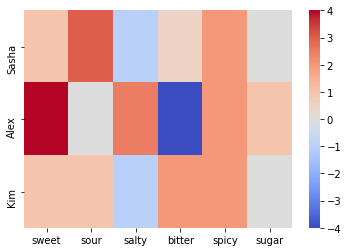

In [18]:
import seaborn as sns

sns.heatmap(df, cmap='coolwarm');

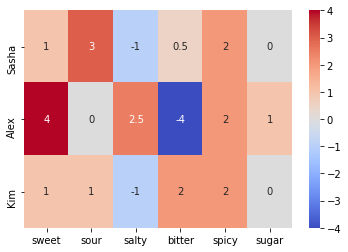

In [19]:
sns.heatmap(df, cmap='coolwarm', annot=True);

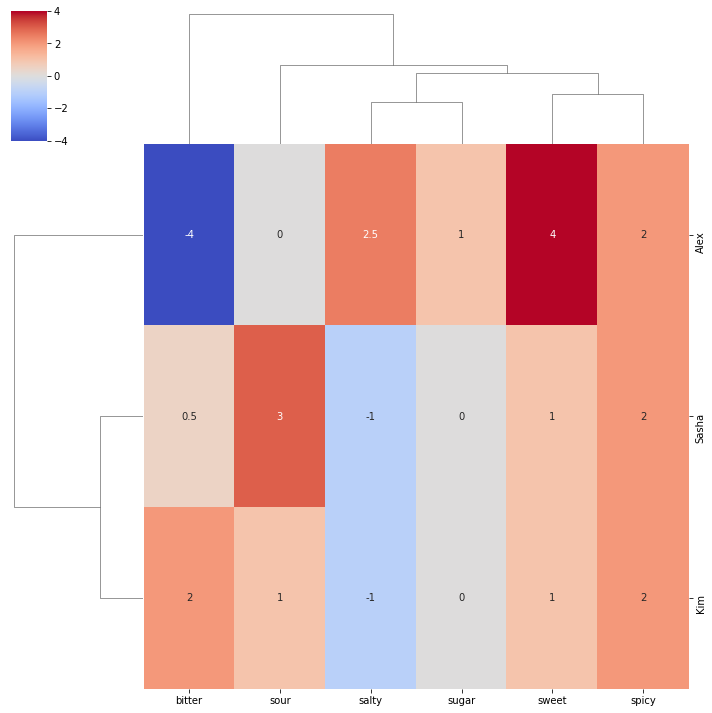

In [20]:
sns.clustermap(df, cmap='coolwarm', annot=True);

## Or even interactively

Using [clustergrammer](https://clustergrammer.readthedocs.io/) - interactive hierarchically clustered heatmaps, mostly for biology.

In [21]:
from clustergrammer2 import Network, CGM2

net = Network(CGM2)
net.load_df(df)

>> clustergrammer2 backend version 0.15.0


In [22]:
net.widget()

CGM2(network='{"row_nodes": [{"name": "Sasha", "ini": 3, "clust": 1, "rank": 1, "rankvar": 1}, {"name": "Alex"…

## So, we are done?



<img src="imgs/tensor_chaos.png" alt="Matrix rain of symbols" style="width: 80%;"/>

(from [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch))

### OK, but do we actually need it?

(except for some super-advanced physics)

Yes, for colors! RGB(A) channels.

* width, height, channel

In deep learning, we process a few images at the same time:

* sample, height, width, channel

* sample, channel, height, width
* sample, channel, width, height
* ???

## So, let's memorize that!

Well, for sure we can learn the order of dimensions. Practice makes perfect!

Then see it:

* OpenCV: `HWC` / `HW`
* Pillow:  `HWC` / `HW`
* Matplotlib: `HWC` / `HW`
* Theano: `NCHW`
* TensorFlow: `NHWC`
* PyTorch: `NCHW`

Is it only me, or does the **Theano tensor dimension order** sounds like some secret convent?

In PyTorch there are [Inconsistent dimension ordering for 1D networks - NCL vs NLC vs LNC](https://discuss.pytorch.org/t/inconsistent-dimension-ordering-for-1d-networks-ncl-vs-nlc-vs-lnc/14807).

## Tensors in PyTorch

Full disclaimer: I love PyTorch.

In [23]:
import torch

x = torch.tensor([[
    [[1., 0., 1.],
     [0., 1., 0.],
     [1., 0., 1.]],
    [[0., 1., 0.],
     [1., 1., 1.],
     [0., 1., 0.]],
    [[1., 1., 1.],
     [1., 0., 1.],
     [1., 1., 1.]],
]])

In [24]:
x

tensor([[[[1., 0., 1.],
          [0., 1., 0.],
          [1., 0., 1.]],

         [[0., 1., 0.],
          [1., 1., 1.],
          [0., 1., 0.]],

         [[1., 1., 1.],
          [1., 0., 1.],
          [1., 1., 1.]]]])

In [25]:
x.dtype

torch.float32

In [26]:
x.size()

torch.Size([1, 3, 3, 3])

In [27]:
x.mean(1)

tensor([[[0.6667, 0.6667, 0.6667],
         [0.6667, 0.6667, 0.6667],
         [0.6667, 0.6667, 0.6667]]])

## Named tensors

Starting from `PyTorch 1.4.0`, there is [support for dimension names in tensors](https://pytorch.org/docs/stable/named_tensor.html).

However, still at `PyTorch 1.6.0` it is an experimental feature.

In [28]:
x = x.rename('N', 'C', 'H', 'W')
x

2020-07-30 22:47:30,325 [96730] WARNING  py.warnings:110: [JupyterRequire] /opt/anaconda3/lib/python3.7/site-packages/torch/tensor.py:723: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/c10/core/TensorImpl.h:840.)
  return super(Tensor, self).rename(names)



tensor([[[[1., 0., 1.],
          [0., 1., 0.],
          [1., 0., 1.]],

         [[0., 1., 0.],
          [1., 1., 1.],
          [0., 1., 0.]],

         [[1., 1., 1.],
          [1., 0., 1.],
          [1., 1., 1.]]]], names=('N', 'C', 'H', 'W'))

In [29]:
x.mean('C')

tensor([[[0.6667, 0.6667, 0.6667],
         [0.6667, 0.6667, 0.6667],
         [0.6667, 0.6667, 0.6667]]], names=('N', 'H', 'W'))

In [30]:
x.mean(('H', 'W'))

tensor([[0.5556, 0.5556, 0.8889]], names=('N', 'C'))

In [31]:
x.transpose('H', 'W')

tensor([[[[1., 0., 1.],
          [0., 1., 0.],
          [1., 0., 1.]],

         [[0., 1., 0.],
          [1., 1., 1.],
          [0., 1., 0.]],

         [[1., 1., 1.],
          [1., 0., 1.],
          [1., 1., 1.]]]], names=('N', 'C', 'W', 'H'))

In [32]:
x.flatten(['C', 'H', 'W'], 'features')

tensor([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
         1., 1., 1., 1., 0., 1., 1., 1., 1.]], names=('N', 'features'))

In [33]:
m1 = torch.tensor([[1., 2.], [3., 4.]], names=('H', 'W'))
m2 = torch.tensor([[0, 1.], [1., 0.]], names=('W', 'H'))

In [34]:
m1 + m2

RuntimeError: Error when attempting to broadcast dims ['H', 'W'] and dims ['W', 'H']: dim 'W' and dim 'H' are at the same position from the right but do not match.

In [35]:
# We can fix that!
m1 + m2.transpose('W', 'H')

tensor([[1., 3.],
        [4., 4.]], names=('H', 'W'))

## Awesome! Let's use the names in neural networks!

In [36]:
from torch import nn

In [37]:
x_input =  torch.rand((4, 4), names=('N', 'C'))
x_input

tensor([[0.1011, 0.0956, 0.6034, 0.8772],
        [0.4385, 0.1957, 0.4768, 0.3740],
        [0.5953, 0.7032, 0.9211, 0.8834],
        [0.6115, 0.4057, 0.1443, 0.0208]], names=('N', 'C'))

In [38]:
# a dense (fully-connected) layer
fc = nn.Linear(in_features=4, out_features=2)
fc(x_input)

tensor([[-0.1660, -0.4661],
        [-0.1843, -0.0722],
        [-0.1989, -0.7008],
        [-0.3339,  0.2273]], grad_fn=<AddmmBackward>, names=('N', None))

It only sort of works. And it gets worse.

In [39]:
x_input_2d =  torch.rand((4, 3, 4, 4), names=('N', 'C', 'H', 'W'))
conv = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3)
conv(x_input_2d)

RuntimeError: aten::mkldnn_convolution is not yet supported with named tensors. Please drop names via `tensor = tensor.rename(None)`, call the op with an unnamed tensor, and set names on the result of the operation.

> RuntimeError: aten::mkldnn_convolution is not yet supported with named tensors. Please drop names via `tensor = tensor.rename(None)`, call the op with an unnamed tensor, and set names on the result of the operation.
            
#### My first response

😞

#### My second response

What, there is an instruction how to solve it!

## Named neural networks

A very experimental package: [github.com/stared/pytorch-named-dims](https://github.com/stared/pytorch-named-dims) by Bartłomiej Olechno and me, from ECC Games.

Inspired by:

* [Quantum Tensors JS](https://github.com/Quantum-Game/quantum-tensors) by Piotr Migdał
* [Tensor Considered Harmful](http://nlp.seas.harvard.edu/NamedTensor) by Alexander Rush

Not yet on PyPI, but you can install directly from the repo:

`pip install git+git://github.com/stared/pytorch-named-dims.git`

In [40]:
import torch
from torch import nn
from pytorch_named_dims import nm

convs = nn.Sequential(
    nm.Conv2d(3, 5, kernel_size=3, padding=1),
    nn.ReLU(),  # preserves dims on its own
    nm.MaxPool2d(2, 2),
    nm.Conv2d(5, 2, kernel_size=3, padding=1)
)

In [41]:
x_input = torch.rand((2, 3, 2, 2), names=('N', 'C', 'H', 'W'))
convs(x_input)

tensor([[[[-0.0050]],

         [[ 0.0938]]],


        [[[-0.0194]],

         [[ 0.1004]]]], grad_fn=<AliasBackward>, names=('N', 'C', 'H', 'W'))

In [42]:
x_input = torch.rand((2, 3, 2, 2), names=('N', 'C', 'W', 'H'))
convs(x_input)

ValueError: Layer NamedConv2d requires dimensions ['N', 'C', 'H', 'W'] but got ['N', 'C', 'W', 'H'] instead.

Still, it is as permissive and accepting as Python! 🐍❤️

In [43]:
x_input = torch.rand((2, 3, 2, 2), names=('N', 'C', None, None))
convs(x_input)

tensor([[[[-0.0262]],

         [[ 0.0994]]],


        [[[ 0.0190]],

         [[ 0.0969]]]], grad_fn=<AliasBackward>, names=('N', 'C', 'H', 'W'))

## Quantum mechanics

Deep learning (so called "AI") is difficult?

Let's try quantum mechanics!

It is not thaaat bad - see [Quantum mechanics for high-school students](https://p.migdal.pl/2016/08/15/quantum-mechanics-for-high-school-students.html) and play the [Quantum Game with Photons](https://quantumgame.io/).

In quantum mechanics, we

* use complex numbers,
* there are as many dimensions as particles,
* for operations - twice as much.

In [44]:
# BTW: complex numbers are even in plain Python
(1 - 2j) * (3 + 1j)

(5-5j)

## QuTiP

[QuTiP: Quantum Toolbox in Python](http://qutip.org/), perhaps the easiest way to approach quantum mechanics with Python.

A few examples of [Qubism visualizations](https://nbviewer.jupyter.org/github/qutip/qutip-notebooks/blob/master/examples/qubism-and-schmidt-plots.ipynb) to show quantum states, based on **Qubism: self-similar visualization of many-body wavefunctions**, New J. Phys. 14 053028 (2012).

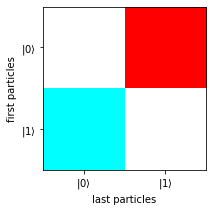

In [45]:
from qutip import ket, plot_schmidt
singlet = (ket('01') - ket('10')).unit()
plot_schmidt(singlet, figsize=(3, 3));

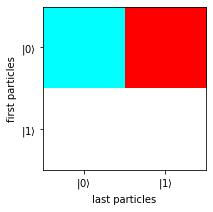

In [46]:
separable = (ket('01') - ket('00')).unit()
plot_schmidt(separable, figsize=(3, 3));

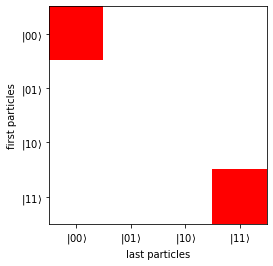

In [47]:
ghz4 = (ket('0000') + ket('1111')).unit()
plot_schmidt(ghz4, figsize=(4, 4));

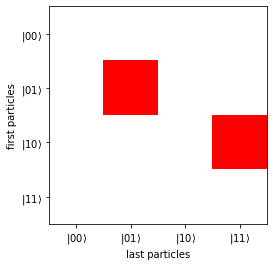

In [48]:
state = (ket('0101') + ket('1011')).unit()
plot_schmidt(state, figsize=(4, 4));

##  Bra Ket Vue  `⟨𝜑|𝜓⟩.vue`


[Bra Ket Vue](https://github.com/Quantum-Game/bra-ket-vue) a Vue-based visualization of quantum states and operations. 

A very new one - we released that with Klem Jankiewicz this May!

This slide is intentionally empty. 

Tried to use JavaScript code in Jupyter, but I failed (again).

Instead: I will use [JSFiddle](https://jsfiddle.net/user/fiddles/all/).

In [49]:
%%html
<script async src="//jsfiddle.net/stared/57b231yu/embed/"></script>

In [50]:
%%html
<script async src="//jsfiddle.net/stared/kc0de19n/embed/"></script>

In [51]:
%%html
<script async src="//jsfiddle.net/stared/0t3beofr/embed/"></script>

In [52]:
%%html
<script async src="//jsfiddle.net/stared/Lx7fn2r1/embed/"></script>

In [53]:
%%html
<script async src="//jsfiddle.net/stared/ryux9pcw/embed/"></script>

## Thanks!  Спасибо!

[p.migdal.pl](https://p.migdal.pl/), [@pmigdal](https://twitter.com/pmigdal), [github.com/stared](https://github.com/stared)

* training neural networks? use [livelossplot](https://github.com/stared/livelossplot/) for interactive charts (over 170k downloads!)
* tensors in JavaScript and their vis: [github.com/Quantum-Game](https://github.com/Quantum-Game)
* from Zen of Python and Jupyter Notebook to TypeScript and tests: [How I Learned to Stop Worrying and Love the Types & Tests](https://p.migdal.pl/2020/03/02/types-tests-typescript.html)
* [Bra Ket Vue in Distill RMarkdown](https://p.migdal.pl/bra-ket-vue-art/) (RMarkdown is like Jupyter but better)
* interactive slides created with [Jupyter Notebook & RISE](https://github.com/damianavila/RISE)